## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools
import heapq

## Dataset Original

In [2]:
dataset = pd.read_csv('../CreatingDataset/TimeDomain/ElectricCurrentDataset.txt')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Device
0,0.0,1.66,1.84,2.09,1.66,1.24,0.71,0.00,0.60,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
1,0.0,1.31,1.13,1.59,1.74,1.56,1.35,1.03,0.64,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
2,0.0,0.96,1.74,1.70,2.02,1.66,1.06,0.53,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
3,0.0,1.24,2.27,2.02,1.95,1.56,1.13,0.67,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook
4,0.0,1.70,1.77,1.98,1.81,1.13,0.78,0.71,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Notebook


# PARTE 1
Correntes Isoladas

### Classes do Dataset

In [3]:
device_position = 'Device'
classes=[]
for i in dataset[device_position]:
    if i not in classes:
        classes.append(i)
print('Exemplos\t Classes\n')
for classe in classes:
    num_exemplos = dataset[dataset[device_position]==classe].count()[0]
    print(num_exemplos, '\t\t',classe)

print()
print('Número de Classes:', len(classes))

Exemplos	 Classes

200 		 Notebook
200 		 Ventilador
200 		 Liquidificador
200 		 Geladeira

Número de Classes: 4


### Holdout 80/20

In [4]:
y = dataset[device_position]
x = dataset.drop([device_position], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

## Treinamentos e Testes

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
previsaokNN = knn.predict(X_test)

KNN1 = accuracy_score(Y_test, previsaokNN)
print('Modelo:\tAcurácias:')
print('KNN:\t', KNN1)
      
nc = NearestCentroid()
nc.fit(X_train, Y_train)
previsaoNC = nc.predict(X_test)

CN1 = accuracy_score(Y_test, previsaoNC)
print('CN: \t', CN1)
      
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
previsaoGNB = gnb.predict(X_test)

GNB1 = accuracy_score(Y_test, previsaoGNB)
print('GNB:\t', GNB1)
      
MLP = MLPClassifier(hidden_layer_sizes=(12,11,11),
                     max_iter=1000, 
                     activation='identity', 
                     learning_rate='constant',
                     learning_rate_init=0.00001,
                     batch_size = 128,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)
previsaoMLP = MLP.predict(X_test)

MLP1 = accuracy_score(Y_test, previsaoMLP)
print('MLP:\t', MLP1)

Modelo:	Acurácias:
KNN:	 1.0
CN: 	 0.99375
GNB:	 0.98125
MLP:	 1.0


# PARTE 2
Acrescentando-se ao dataset Correntes Combinadas dois a dois

## Combinações de Correntes

In [6]:
classes=[]
for i in dataset['Device']:
    if i not in classes:
        classes.append(i)

In [7]:
#Transformando o Dataframe dataset em matriz
matrix_dataset = list(dataset.as_matrix())

/Users/jeanlima/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
#transformando cada linha da matriz em um numpy array
for i in range(len(matrix_dataset)):
    matrix_dataset[i] = np.asarray(matrix_dataset[i])

In [9]:
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        if i+(200*j)<len(dataset):
            matrix_dataset.append(matrix_dataset[i]+matrix_dataset[i+(200*j)])

In [10]:
new_dataset = pd.DataFrame(matrix_dataset)

### Classes do Dataset

In [11]:
device_position = 300
classes=[]
for i in new_dataset[device_position]:
    if i not in classes:
        classes.append(i)
print('Exemplos\t Classes\n')
for classe in classes:
    num_exemplos = new_dataset[new_dataset[device_position]==classe].count()[0]
    print(num_exemplos, '\t\t',classe)

print()
print('Número de Classes:', len(classes))

Exemplos	 Classes

200 		 Notebook
200 		 Ventilador
200 		 Liquidificador
200 		 Geladeira
200 		 NotebookVentilador
200 		 NotebookLiquidificador
200 		 NotebookGeladeira
200 		 VentiladorLiquidificador
200 		 VentiladorGeladeira
200 		 LiquidificadorGeladeira

Número de Classes: 10


### Holdout 80/20

In [12]:
y = new_dataset[device_position]
x = new_dataset.drop([device_position], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

## Treinamentos e Testes

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
previsaokNN = knn.predict(X_test)

KNN2 = accuracy_score(Y_test, previsaokNN)
print('Modelo:\tAcurácias:')
print('KNN:\t', KNN2)
      
nc = NearestCentroid()
nc.fit(X_train, Y_train)
previsaoNC = nc.predict(X_test)

CN2 = accuracy_score(Y_test, previsaoNC)
print('CN: \t', CN2)
      
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
previsaoGNB = gnb.predict(X_test)

GNB2 = accuracy_score(Y_test, previsaoGNB)
print('GNB:\t', GNB2)
      
MLP = MLPClassifier(hidden_layer_sizes=(12,11,11),
                     max_iter=1000, 
                     activation='identity', 
                     learning_rate='constant',
                     learning_rate_init=0.00001,
                     batch_size = 128,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)
previsaoMLP = MLP.predict(X_test)

MLP2 = accuracy_score(Y_test, previsaoMLP)
print('MLP:\t', MLP2)

Modelo:	Acurácias:
KNN:	 0.665
CN: 	 0.69
GNB:	 0.8475
MLP:	 0.9725


# PARTE 3
Acrescentando-se ao dataset Correntes Combinadas três a três

### Três a três

In [14]:
for i in range(len(dataset)):
    for j in range(1, len(classes)):
        for k in range(1, len(classes)):
            if i+(200*j) < len(dataset) and i+(200*(j+k)) < len(dataset):
                matrix_dataset.append(matrix_dataset[i] + matrix_dataset[i+(200*j)] + matrix_dataset[i+(200*(j+k))])

In [15]:
new_dataset = pd.DataFrame(matrix_dataset)

### Classes do Dataset

In [16]:
device_position = 300
classes=[]
for i in new_dataset[device_position]:
    if i not in classes:
        classes.append(i)
print('Exemplos\t Classes\n')
for classe in classes:
    num_exemplos = new_dataset[new_dataset[device_position]==classe].count()[0]
    print(num_exemplos, '\t\t',classe)

print()
print('Número de Classes:', len(classes))

Exemplos	 Classes

200 		 Notebook
200 		 Ventilador
200 		 Liquidificador
200 		 Geladeira
200 		 NotebookVentilador
200 		 NotebookLiquidificador
200 		 NotebookGeladeira
200 		 VentiladorLiquidificador
200 		 VentiladorGeladeira
200 		 LiquidificadorGeladeira
200 		 NotebookVentiladorLiquidificador
200 		 NotebookVentiladorGeladeira
200 		 NotebookLiquidificadorGeladeira
200 		 VentiladorLiquidificadorGeladeira

Número de Classes: 14


### Holdout 80/20

In [17]:
y = new_dataset[device_position]
x = new_dataset.drop([device_position], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

## Treinamentos e Testes

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
previsaokNN = knn.predict(X_test)

KNN3 = accuracy_score(Y_test, previsaokNN)
print('Modelo:\tAcurácias:')
print('KNN:\t', KNN3)
      
nc = NearestCentroid()
nc.fit(X_train, Y_train)
previsaoNC = nc.predict(X_test)

CN3 = accuracy_score(Y_test, previsaoNC)
print('CN: \t', CN3)
      
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
previsaoGNB = gnb.predict(X_test)

GNB3 = accuracy_score(Y_test, previsaoGNB)
print('GNB:\t', GNB3)
      
MLP = MLPClassifier(hidden_layer_sizes=(12,11,11),
                     max_iter=1000, 
                     activation='identity', 
                     learning_rate='constant',
                     learning_rate_init=0.00001,
                     batch_size = 128,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)
previsaoMLP = MLP.predict(X_test)

MLP3 = accuracy_score(Y_test, previsaoMLP)
print('MLP:\t', MLP3)

Modelo:	Acurácias:
KNN:	 0.5267857142857143
CN: 	 0.5946428571428571
GNB:	 0.7839285714285714
MLP:	 0.9


# PARTE 4
Acrescentando-se ao dataset Correntes Combinadas quatro a quatro

### Quatro a quatro

In [19]:
for i in range(200):
    matrix_dataset.append(matrix_dataset[i] + matrix_dataset[i+(200*1)] + matrix_dataset[i+(200*(2))] + matrix_dataset[i+(200*(3))])

In [20]:
new_dataset = pd.DataFrame(matrix_dataset)

### Classes do Dataset

In [21]:
device_position = 300
classes=[]
for i in new_dataset[device_position]:
    if i not in classes:
        classes.append(i)
print('Exemplos\t Classes\n')
for classe in classes:
    num_exemplos = new_dataset[new_dataset[device_position]==classe].count()[0]
    print(num_exemplos, '\t\t',classe)

print()
print('Número de Classes:', len(classes))

Exemplos	 Classes

200 		 Notebook
200 		 Ventilador
200 		 Liquidificador
200 		 Geladeira
200 		 NotebookVentilador
200 		 NotebookLiquidificador
200 		 NotebookGeladeira
200 		 VentiladorLiquidificador
200 		 VentiladorGeladeira
200 		 LiquidificadorGeladeira
200 		 NotebookVentiladorLiquidificador
200 		 NotebookVentiladorGeladeira
200 		 NotebookLiquidificadorGeladeira
200 		 VentiladorLiquidificadorGeladeira
200 		 NotebookVentiladorLiquidificadorGeladeira

Número de Classes: 15


## Holdout 80/20

In [22]:
y = new_dataset[device_position]
x = new_dataset.drop([device_position], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)

## Treinamentos e Testes

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
previsaokNN = knn.predict(X_test)

KNN4 = accuracy_score(Y_test, previsaokNN)
print('Modelo:\tAcurácias:')
print('KNN:\t', KNN4)
      
nc = NearestCentroid()
nc.fit(X_train, Y_train)
previsaoNC = nc.predict(X_test)

CN4 = accuracy_score(Y_test, previsaoNC)
print('CN: \t', CN4)
      
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
previsaoGNB = gnb.predict(X_test)

GNB4 = accuracy_score(Y_test, previsaoGNB)
print('GNB:\t', GNB4)
      
MLP = MLPClassifier(hidden_layer_sizes=(12,11,11),
                     max_iter=1000, 
                     activation='identity', 
                     learning_rate='constant',
                     learning_rate_init=0.00001,
                     batch_size = 128,
                     solver = 'lbfgs')
MLP.fit(X_train, Y_train)
previsaoMLP = MLP.predict(X_test)

MLP4 = accuracy_score(Y_test, previsaoMLP)
print('MLP:\t', MLP4)

Modelo:	Acurácias:
KNN:	 0.43
CN: 	 0.5216666666666666
GNB:	 0.7316666666666667
MLP:	 0.9316666666666666


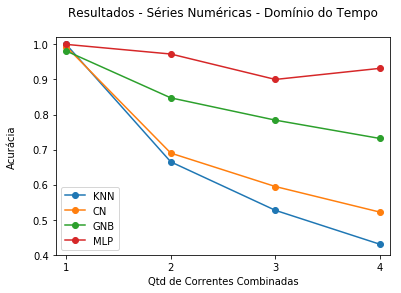

In [30]:
y = [KNN1, KNN2, KNN3, KNN4]
x = ['1', '2', '3', '4']
plt.plot(x, y, marker = 'o', label='KNN')


y = [CN1, CN2, CN3, CN4]
plt.plot(x, y, marker='o', label='CN')

y = [GNB1, GNB2, GNB3, GNB4]
plt.plot(x, y, marker='o', label='GNB')

y = [MLP1, MLP2, MLP3, MLP4]
plt.plot(x, y, marker='o', label='MLP')


plt.legend()
plt.title('Resultados - Séries Numéricas - Domínio do Tempo\n')
plt.ylabel("Acurácia\n")
plt.xlabel("Qtd de Correntes Combinadas")
plt.axis([-0.1, 3.1, 0.4, 1.02])
plt.savefig('Resultados - Séries Numéricas - Domínio do Tempo')